In [3]:
import sys
import os

print('当前 Python 解释器路径：')
print(sys.executable)

当前 Python 解释器路径：
/Users/ayuliao/Desktop/workspace/learn_ai/venv/bin/python3


In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
from sklearn.tree import DecisionTreeClassifier

X = iris.data[:, 2:]  # 花瓣的长与宽
y = iris.target  # 花的种类

# 分类决策树，max_depth=2表示决策树最大高度为2
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(133.92000000000002, 181.2, 'X[1] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

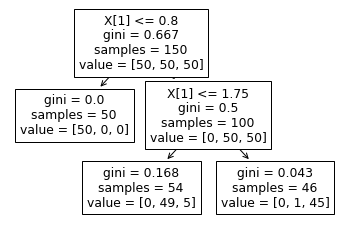

In [24]:
from sklearn import tree
tree.plot_tree(tree_clf) 

In [12]:
import os


PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


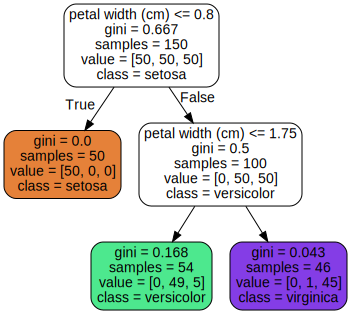

In [29]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],  # 特征
        class_names=iris.target_names,  # 分类
        rounded=True,  # 圆角
        filled=True,  # 颜色填充
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [30]:
from sklearn.tree import DecisionTreeClassifier

X = iris.data[:, 2:]  # 花瓣的长与宽
y = iris.target  # 花的种类

# 分类决策树，max_depth=2表示决策树最大高度为2
tree_clf2 = DecisionTreeClassifier(max_depth=2, criterion="entropy")
tree_clf2.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

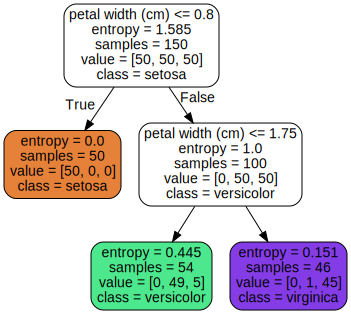

In [31]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf2,
        out_file=os.path.join(IMAGES_PATH, "iris_tree2.dot"),
        feature_names=iris.feature_names[2:],  # 特征
        class_names=iris.target_names,  # 分类
        rounded=True,  # 圆角
        filled=True,  # 颜色填充
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree2.dot"))

In [32]:
import numpy as np

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [33]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

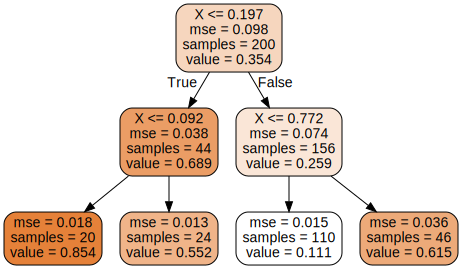

In [35]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_reg,
        out_file=os.path.join(IMAGES_PATH, "reg_tree.dot"),
        feature_names='X',  # 特征
        class_names='y',  # 目标
        rounded=True,  # 圆角
        filled=True,  # 颜色填充
    )

Source.from_file(os.path.join(IMAGES_PATH, "reg_tree.dot"))

In [37]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

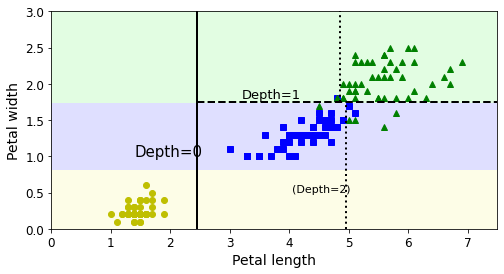

In [40]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    # 指定间隔内，返回均匀的数字
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    # meshgrid函数:用两个坐标轴上的点在平面上画网格，其实返回的是矩阵
    x1, x2 = np.meshgrid(x1s, x2s)
    # 按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # 预测
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
X = iris.data[:, 2:]  # 花瓣的长与宽
y = iris.target  # 花的种类
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

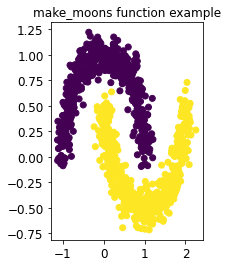

In [42]:
from sklearn.datasets import make_moons 

plt.subplot(122)  
x1,y1=make_moons(n_samples=1000,noise=0.1)  
plt.title('make_moons function example')  
plt.scatter(x1[:,0],x1[:,1],marker='o',c=y1)  
plt.show() 

<function matplotlib.pyplot.show(close=None, block=None)>

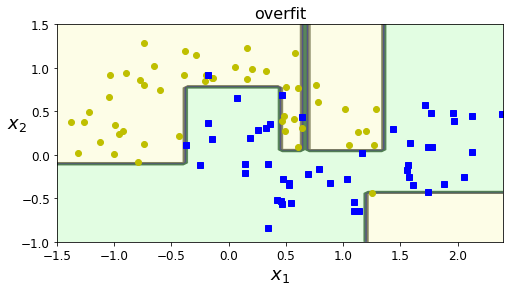

In [44]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# 分类决策树
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(Xm, ym)

# 可视化
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("overfit", fontsize=16)
plt.show()

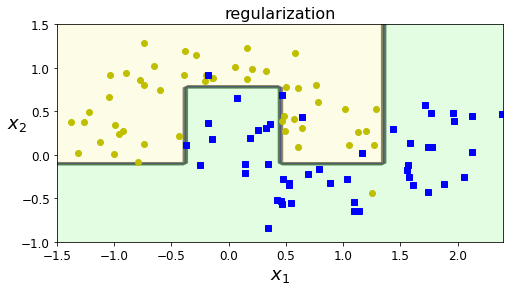

In [46]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# 分类决策树
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=4)
tree_clf.fit(Xm, ym)

# 可视化
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("regularization", fontsize=16)
plt.show()

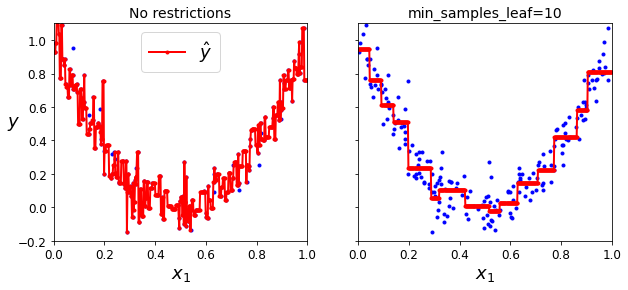

In [48]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)
plt.show()

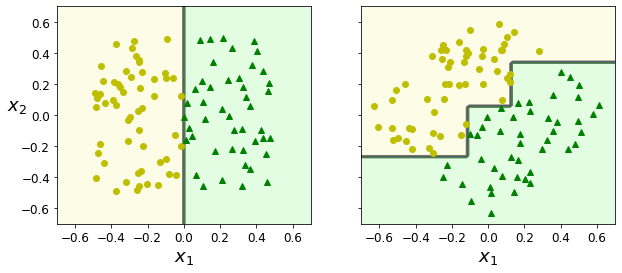

In [49]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")
plt.show()

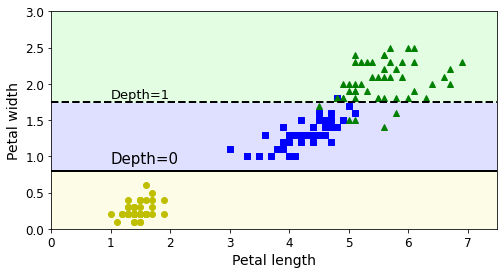

In [51]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()